In [1]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from scipy.signal import medfilt

In [2]:
DAC = np.arange(250, 19, -1)
INTENSITIES = np.arange(11, 50, 6)
STR_INTENSITIES = ["%d kV"%i for i in INTENSITIES]

In [3]:
def getData(directory):
    data = []
    folders = sorted(glob(directory))
    for folder in folders:
        files = glob(folder + "/*")
        temp = np.array([np.genfromtxt(file) for file in files])
        data.append(temp)
    return np.array(data)

In [4]:
tungsteno = getData("1. Tungsteno/*")
plata = getData("2. Plata/*")

In [5]:
mean_tungsteno = tungsteno.mean(axis = 1)
mean_plata = plata.mean(axis = 1)

filtered_tungsteno = medfilt(mean_tungsteno, [1, 3])
filtered_plata = medfilt(mean_plata, [1, 3])

normed_tungsteno = filtered_tungsteno / np.trapz(filtered_tungsteno)[:, np.newaxis]
normed_plata = filtered_plata / np.trapz(filtered_plata)[:, np.newaxis]

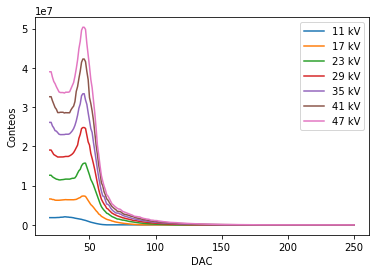

In [6]:
for i in range(filtered_tungsteno.shape[0]):
    plt.plot(DAC, filtered_tungsteno[i], label = STR_INTENSITIES[i])

plt.xlabel("DAC")
plt.ylabel("Conteos")
plt.legend()

plt.savefig("Tungsteno_Means.pdf")
plt.show()

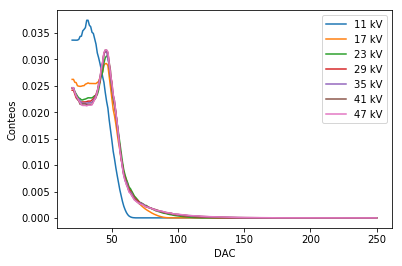

In [7]:
for i in range(normed_tungsteno.shape[0]):
    plt.plot(DAC, normed_tungsteno[i], label = STR_INTENSITIES[i])

plt.xlabel("DAC")
plt.ylabel("Conteos")
plt.legend()

plt.savefig("Tungsteno_Normed.pdf")
plt.show()

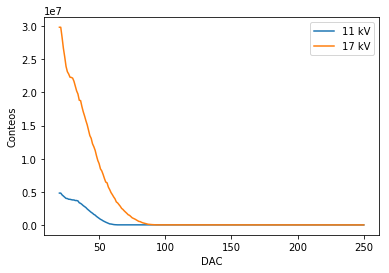

In [8]:
for i in range(filtered_plata.shape[0]):
    plt.plot(DAC, filtered_plata[i], label = STR_INTENSITIES[i])

plt.xlabel("DAC")
plt.ylabel("Conteos")
plt.legend()

plt.savefig("Plata_Means.pdf")
plt.show()

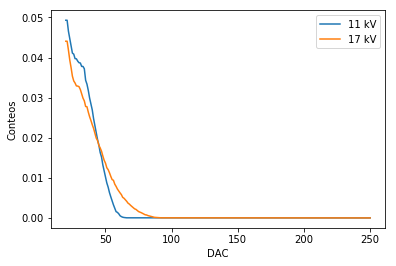

In [9]:
for i in range(normed_plata.shape[0]):
    plt.plot(DAC, normed_plata[i], label = STR_INTENSITIES[i])

plt.xlabel("DAC")
plt.ylabel("Conteos")
plt.legend()

plt.savefig("Plata_Normed.pdf")
plt.show()